In [17]:
import numpy as np 
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm


In [22]:
def download_data(stock, start_date,end_date):
    data=yf.download(stock,start_date,end_date)
    data['Price']=data['Adj Close']
    return pd.DataFrame(data)
def daily_returns(data):
    data=np.log(data['Price']/data['Price'].shift(1))
    return pd.DataFrame(data)[1:]
def plot_data(data):
    plt.hist(data, bins=700)
    stock_variance = data.var()
    stock_mean = data.mean()
    sigma = np.sqrt(stock_variance)
    x = np.linspace(stock_mean - 3 * sigma, stock_mean + 3 * sigma, 200)
    plt.plot(x, norm.pdf(x, stock_mean, sigma))
    plt.show()
    


[*********************100%***********************]  1 of 1 completed


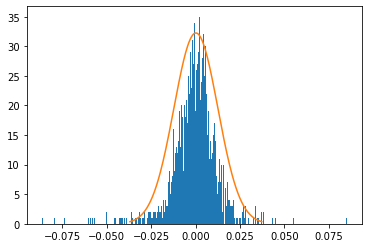

In [23]:
if __name__=="__main__":
    
    stock = download_data('IBM', '2010-01-01', '2020-01-01')
    log_daily_returns = daily_returns(stock)
    plot_data(log_daily_returns)

    